# DATA PRE PROCESSING PART

Importing necessary libraries

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Importing Data 

In [86]:
data=pd.read_csv('resumes_development.csv')

finding null values

In [87]:
null_values=data.isnull().sum() 

Dropping Female, URM, Disability,Veteran column

In [88]:
#these columns are dropped to train the model just on the basis of skills
data=data.drop(["Female", "URM", "Disability","Veteran"], axis=1)

Dropping the unnamed column

In [89]:
data=data.drop(["Unnamed: 0"], axis=1)

We will be predicting if the person will be called for interview or not on the basis of his skills on resume

Splitting Data into train and test set

In [90]:
y=data.Interview.values
x=data.drop(["Interview"], axis=1)

In [91]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=1)

# Implementing Logistic Regression

In [92]:
from sklearn.linear_model import LogisticRegression

In [93]:
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [94]:
from sklearn.model_selection import cross_val_score

In [95]:
accuracies_logistic=cross_val_score(estimator=classifier, X=X_train,y=y_train,cv=15)

In [96]:
accuracies_logistic.mean()

0.958374384236453

In [97]:
accuracies_logistic.std()

0.03148537366850549

In [98]:
from sklearn.model_selection import GridSearchCV
parameters=[{'C':[1,10,100,1000],'tol':[0.0001,0.0002,0.0003,0.0004,0.0005]}]
grid_search = GridSearchCV(estimator=classifier,param_grid=parameters,scoring='accuracy',cv=15)
grid_search=grid_search.fit(X_train,y_train)
best_accuracy_logistic = grid_search.best_score_
best_parameters_logistic = grid_search.best_params_

In [99]:
best_accuracy_logistic

0.958374384236453

In [100]:
best_parameters_logistic

{'C': 1, 'tol': 0.0001}

predicting results

In [101]:
y_pred_logistic=classifier.predict(X_test)

Score of Logistic regression

In [102]:
logistic_score = classifier.score(X_test,y_test)
logistic_score=logistic_score*100
logistic_score

92.47311827956989

# Implementing KNN

In [103]:
from sklearn.neighbors import KNeighborsClassifier

In [104]:
classifier = KNeighborsClassifier(metric='minkowski',p=1,leaf_size= 100, n_neighbors=20,weights='uniform')
classifier.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=100, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=20, p=1,
                     weights='uniform')

In [105]:
y_pred_KNN=classifier.predict(X_test)

In [106]:
accuracies_KNN=cross_val_score(estimator=classifier, X=X_train,y=y_train,cv=15)

In [107]:
accuracies_KNN.mean()

0.9189655172413793

In [108]:
accuracies_KNN.std()

0.06541437904767068

In [109]:
from sklearn.model_selection import GridSearchCV
parameters=[{'n_neighbors':[2,5,6,7,10,15,20],'weights':['uniform'],'leaf_size':[10,20,30,40,50,100],'p':[1,2]},
           {'n_neighbors':[2,5,6,7,10,15,20],'weights':['distance'],'leaf_size':[10,20,30,40,50,100],'p':[1,2]}]
grid_search = GridSearchCV(estimator=classifier,param_grid=parameters,scoring='accuracy',cv=15)
grid_search=grid_search.fit(X_train,y_train)
best_accuracy_KNN = grid_search.best_score_
best_parameters_KNN = grid_search.best_params_

In [110]:
best_accuracy_KNN

0.9189655172413793

In [111]:
best_parameters_KNN

{'leaf_size': 100, 'n_neighbors': 20, 'p': 1, 'weights': 'uniform'}

In [112]:
KNN_score = classifier.score(X_test,y_test)
KNN_score=KNN_score*100
KNN_score

87.63440860215054

# Implementation of Kernel SVM

In [113]:
from sklearn.svm import SVC

In [114]:
classifier = SVC(kernel = 'rbf')
classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [115]:
y_pred_SVM=classifier.predict(X_test)

In [116]:
accuracies_SVM=cross_val_score(estimator=classifier, X=X_train,y=y_train,cv=15)

In [117]:
accuracies_SVM.mean()

0.9675697865353036

In [118]:
accuracies_SVM.std()

0.03681330003521405

In [119]:
from sklearn.model_selection import GridSearchCV
parameters=[{'C':[1,2,10,100,1000],'kernel':['rbf'],'degree':[1,2,3,4]},
           {'C':[1,2,10,100,1000],'kernel':['poly'],'degree':[1,2,3,4]}]
           
grid_search = GridSearchCV(estimator=classifier,param_grid=parameters,scoring='accuracy',cv=15)
grid_search=grid_search.fit(X_train,y_train)
best_accuracy_SVM = grid_search.best_score_
best_parameters_SVM = grid_search.best_params_

In [120]:
best_accuracy_SVM

0.9675697865353036

In [121]:
best_parameters_SVM

{'C': 1, 'degree': 1, 'kernel': 'rbf'}

In [122]:
SVM_score = classifier.score(X_test,y_test)
SVM_score=SVM_score*100
SVM_score

96.7741935483871

# Implementing Naive Bayes

In [123]:
from sklearn.naive_bayes import GaussianNB


In [124]:
classifier = GaussianNB()
classifier.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [125]:
y_pred_SVM=classifier.predict(X_test)

In [126]:
accuracies_SVM=cross_val_score(estimator=classifier, X=X_train,y=y_train,cv=15)

In [127]:
accuracies_SVM.mean()

0.7943349753694583

In [128]:
accuracies_SVM.std()

0.06269751080244958

In [129]:
Naive_score = classifier.score(X_test,y_test)
Naive_score=Naive_score*100
Naive_score

82.79569892473118

# Implementing Decision Tree

In [130]:
from sklearn.tree import DecisionTreeClassifier

In [131]:
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
a=classifier.fit(X_train, y_train)

In [132]:
y_pred_tree=classifier.predict(X_test)

In [133]:
from sklearn.model_selection import cross_val_score

In [134]:
accuracies_tree=cross_val_score(estimator=classifier, X=X_train,y=y_train,cv=15)

In [135]:
accuracies_tree.mean()

0.7618226600985222

In [136]:
accuracies_tree.std()

0.06775533325477912

In [137]:
tree_score = classifier.score(X_test,y_test)
tree_score=tree_score*100
tree_score

74.73118279569893

# Implementing Random Forest

In [139]:
from sklearn.ensemble import RandomForestClassifier

In [140]:
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
a=classifier.fit(X_train, y_train)

In [141]:
y_pred_Forest=classifier.predict(X_test)

In [142]:
from sklearn.model_selection import cross_val_score

In [143]:
accuracies_Forest=cross_val_score(estimator=classifier, X=X_train,y=y_train,cv=15)

In [144]:
accuracies_Forest.mean()

0.8888341543513955

In [145]:
accuracies_Forest.std()

0.05016104575130658

In [146]:
forest_score = classifier.score(X_test,y_test)
forest_score=forest_score*100
forest_score

90.32258064516128

# Plotting graph

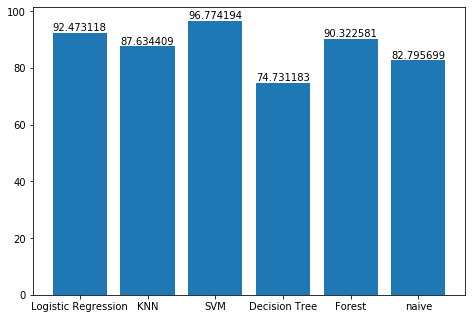

In [147]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
names_algo = ['Logistic Regression','KNN',"SVM",'Decision Tree','Forest','naive']
algo = [logistic_score,KNN_score,SVM_score,tree_score,forest_score,Naive_score]

rects1=ax.bar(names_algo,algo)

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., height,
                '%f' % float(height),
        ha='center', va='bottom')
        
autolabel(rects1)
plt.savefig('plotSkills.png', dpi=100, bbox_inches='tight')
plt.show()
